#### Data

#### Config

In [ ]:
## load some packages
from pandas_datareader.fred import FredReader  # gets data without a bunch of csvs
from scipy.signal import detrend  # detrend series
import matplotlib.pyplot as plt  # make plots
import numpy as np  # math things

# fonts look pretty
plt.rcParams.update({
        'text.usetex': True,
        'font.family': 'serif',
    })

#### Pull Data

In [2]:
## data config
start = '1960-01'
end = '2007-12'
series = {
        'GDPDEF': 'gdpdef',  # gdp deflator
        'GDP': 'gdp',  # gdp
        'GCE': 'gov',  # govt spending
        'W006RC1Q027SBEA': 'tax',  # tax revenues
    }

## pull data
## pull the data
df = FredReader(series.keys(), start=start, end=end).read().rename(columns=series).dropna()

## adjust series
df = df[['gdp', 'gov', 'tax']].div(df['gdpdef'], axis=0)
for x in df.columns:
    df[x] = detrend(np.log(df[x])) * 100

df

,gdp,gov,tax
DATE,,,
1960-01-01,-6.207381,-15.411893,2.433646
1960-04-01,-7.552969,-15.118566,-0.275316
1960-07-01,-7.866166,-12.774345,-2.048241
1960-10-01,-9.961823,-12.190004,-4.701228
1961-01-01,-10.095264,-11.569745,-5.804134
...,...,...,...
2006-10-01,-1.566638,2.143878,8.361621
2007-01-01,-2.070254,2.162052,9.050781
2007-04-01,-2.263960,2.676012,8.469576


#### Plot It

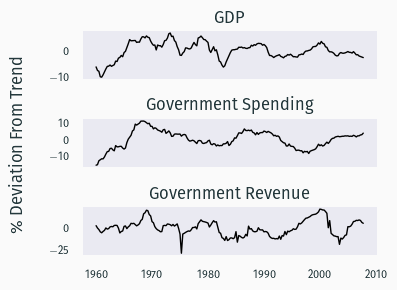

In [ ]:
## plot setup
fig, axs = plt.subplots(3, sharex=True)
fig.set_figwidth(6.5)
fig.set_figheight(5)
fig.supxlabel('Quarter')
fig.supylabel(r'\% Deviation From Trend')

# gdp
axs[0].set_title('GDP')
axs[0].plot(df.index, df['gdp'], 'k-', linewidth=1)

# gov
axs[1].set_title('Government Spending')
axs[1].plot(df.index, df['gov'], 'k-', linewidth=1)

# tax
axs[2].set_title('Government Revenue')
axs[2].plot(df.index, df['tax'], 'k-', linewidth=1)

## final things
fig.tight_layout()
fig.savefig('paper/figures/detrended_data.pdf', bbox_inches='tight')